# **CS351-Lab 08**

**Basics of Neural Networks - Building, Training, and Evaluating**
Training the model on the Digits dataset

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)

Loading and Preprocessing the Digits Dataset

In [2]:
# Load the Digits dataset
from sklearn.datasets import load_digits  # Digits dataset is part of scikit-learn
digits = load_digits()  # Load the dataset into memory
X = digits.data  # Features
y = digits.target  # Target labels
target_names = digits.target_names.astype(str)  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1257, Testing samples: 540


Building the Neural Network

In [3]:

# Build the neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer with ReLU activation
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with ReLU activation
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Third hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for efficient training
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model accuracy

# Display a summary of the model structure
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,538 (6.01 KB)

 Trainable params: 1,538 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

Training the Neural Network

Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1546 - loss: 2.3097 - val_accuracy: 0.4405 - val_loss: 2.0133
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4136 - loss: 1.9076 - val_accuracy: 0.5833 - val_loss: 1.4375
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.3233 - val_accuracy: 0.6905 - val_loss: 0.9833
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7423 - loss: 0.8245 - val_accuracy: 0.8135 - val_loss: 0.7096
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.5696 - val_accuracy: 0.8333 - val_loss: 0.5748
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.4009 - val_accuracy: 0.8571 - val_loss: 0.4925
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.3173 - val_accuracy: 0.8929 - val_loss: 0.4114
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.2277 - val_accuracy: 0.

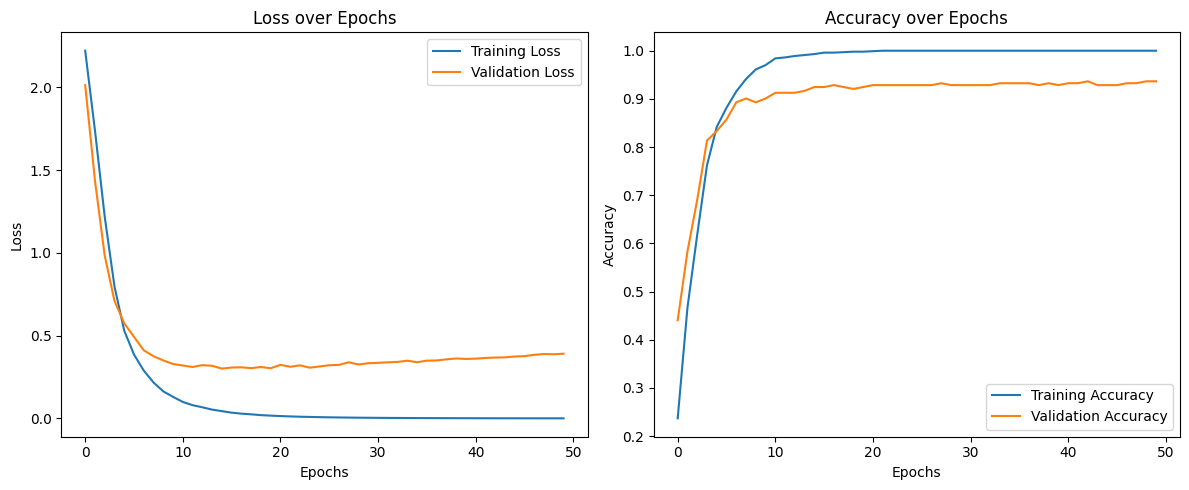

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

Evaluating the Neural Network

Test Loss: 0.2579, Test Accuracy: 0.9407
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.91      0.84      0.88        50
           2       0.96      0.91      0.93        47
           3       0.91      0.96      0.94        54
           4       0.97      0.97      0.97        60
           5       0.95      0.92      0.94        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.85      0.91      0.88        43
           9       0.92      0.92      0.92        59

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



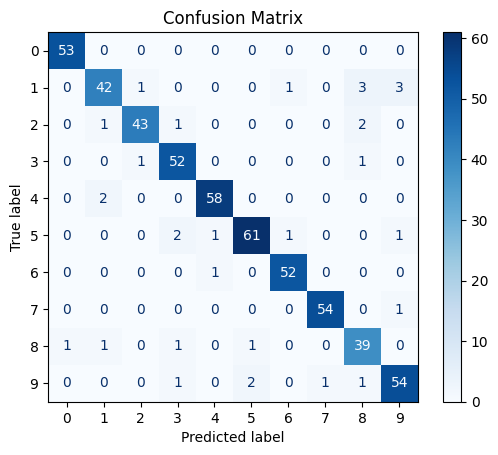

In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate without verbose output
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print test loss and accuracy

# Generate predictions for test data
y_pred = model.predict(X_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Visualising the Neural Network Architecture

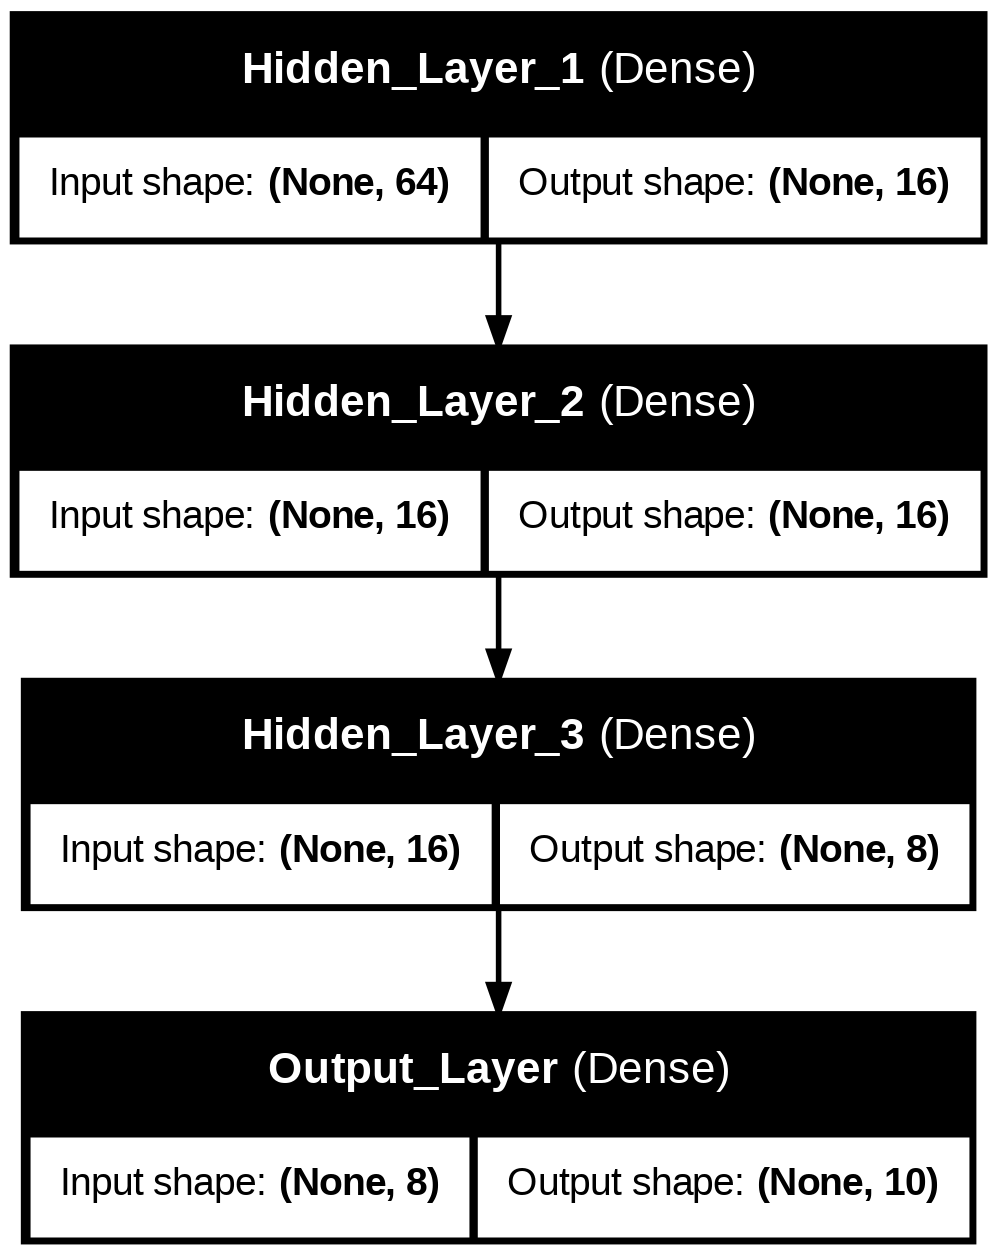

In [6]:
# Visualize the model architecture
from tensorflow.keras.utils import plot_model  # Utility to plot model architecture

# Save the architecture plot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')  # Save as PNG

# Display the saved image
from IPython.display import Image
Image(filename='model_architecture.png')